# Planar Robotic Arm with arbritrary number of rotary joints

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from planarobot import utils
from planarobot.planar_arm import PlanarArm

In [4]:
%matplotlib notebook

## Desired tranjectory

In [5]:
# animation
T = 2*np.pi
dt = 3e-3
t = np.arange(0, T, dt)
N = t.shape[0]

# desired trajectory
traj_x = 14 + np.cos(t)
traj_y = np.sin(t)
traj = np.stack((traj_x, traj_y)).T

traj = utils.interpolate_path(traj, T, dt)  # interpolate path
traj_d = utils.calc_derivatives(traj, dt)  # calculate velocity

<IPython.core.display.Javascript object>


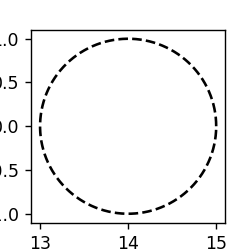

In [6]:
plt.figure(figsize=(2, 2))
plt.plot(traj_x, traj_y, c="k", linestyle="--")
plt.show()

## Initialize robot joints

In [31]:
# robot
total_arm_length = 18
n_links = 50
links = (total_arm_length / n_links) * np.ones(n_links)
robot = PlanarArm(links, base_pos=np.array([0, 2]))

## Trajectory Planning with Inverse Differential Kinematics

In [32]:
robot_pos = robot.trajectory_planning(traj, traj_d, dt, Kp=50)

## Animation

<IPython.core.display.Javascript object>


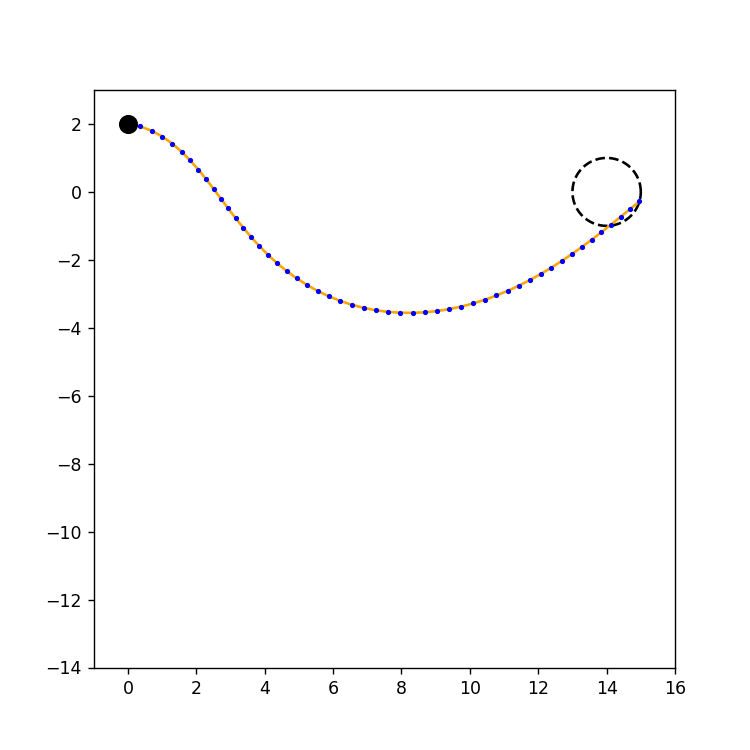

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(N):
    if np.mod(i, 100) == 0:
        ax.cla()
        ax.plot(traj_x, traj_y, c='k', linestyle='--')

        robot.plot(robot_pos[i], ax=ax)
            
        ax.set_xlim([-1, 16])
        ax.set_ylim([-14, 3])

        fig.canvas.draw()